In [1]:
import requests
import time 
import pandas as pd

from bs4 import BeautifulSoup

In [2]:

all_renewables = pd.read_csv('C:/Users/zirav/Desktop/Accenture/My_final_project/renewable_capacity_timeseries.csv', encoding="UTF-8")
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
0,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Getting infformation about the table

In [3]:
# check the final part of the table
all_renewables.tail()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
44161,2020-11-28,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44162,2020-11-29,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44163,2020-11-30,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44164,2020-12-01,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44165,2020-12-02,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8473.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01


In [4]:
all_renewables.shape
all_renewables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44166 entries, 0 to 44165
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   day                            44166 non-null  object 
 1   CH_bioenergy_capacity          44166 non-null  float64
 2   CH_solar_capacity              44166 non-null  float64
 3   CH_wind_onshore_capacity       44166 non-null  float64
 4   DE_bioenergy_capacity          44166 non-null  float64
 5   DE_geothermal_capacity         44166 non-null  float64
 6   DE_solar_capacity              44166 non-null  float64
 7   DE_wind_capacity               44166 non-null  float64
 8   DE_wind_offshore_capacity      44166 non-null  float64
 9   DE_wind_onshore_capacity       44166 non-null  float64
 10  DK_solar_capacity              44166 non-null  float64
 11  DK_wind_capacity               44166 non-null  float64
 12  DK_wind_offshore_capacity      44166 non-null 

In [5]:
all_renewables.columns[20:37]

Index(['GB-GBN_bioenergy_capacity', 'GB-GBN_hydro_capacity',
       'GB-GBN_marine_capacity', 'GB-GBN_solar_capacity',
       'GB-GBN_wind_capacity', 'GB-GBN_wind_offshore_capacity',
       'GB-GBN_wind_onshore_capacity', 'GB-NIR_bioenergy_capacity',
       'GB-NIR_solar_capacity', 'GB-NIR_wind_onshore_capacity',
       'GB-UKM_bioenergy_capacity', 'GB-UKM_hydro_capacity',
       'GB-UKM_marine_capacity', 'GB-UKM_solar_capacity',
       'GB-UKM_wind_capacity', 'GB-UKM_wind_offshore_capacity',
       'GB-UKM_wind_onshore_capacity'],
      dtype='object')

Extracting year

In [6]:
all_renewables.index = all_renewables.day
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
day,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-02,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-03,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-04,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-05,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
all_renewables['day']= pd.to_datetime(all_renewables['day'])
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
day,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-02,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-03,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-04,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-05,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# extracting year
all_renewables['year'] = pd.DatetimeIndex(all_renewables['day']).year
all_renewables.tail()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity,year
day,,,,,,,,,,,,,,,,,,,,,
2020-11-28,2020-11-28,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-11-29,2020-11-29,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-11-30,2020-11-30,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-12-01,2020-12-01,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-12-02,2020-12-02,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8473.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020


Calculation of the whole renewable capacity in Czechia, Germany, Denmark, France and Sweden

In [9]:

all_renews_one_year = all_renewables.loc['2020-01-01':'2020-12-02', 'CH_bioenergy_capacity':'SE_wind_onshore_capacity']
all_renews_one_year

,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,DK_solar_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
day,,,,,,,,,,,,,,,,,,,,,
2020-01-01,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8465.3,21790.1,8492.7,13297.4,8991.96,191.15,8800.81
2020-01-02,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8465.3,21790.1,8492.7,13297.4,8991.96,191.15,8800.81
2020-01-03,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8465.3,21820.0,8492.7,13327.3,8991.96,191.15,8800.81
2020-01-04,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8466.3,21820.0,8492.7,13327.3,8991.96,191.15,8800.81
2020-01-05,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8466.3,21820.0,8492.7,13327.3,8991.96,191.15,8800.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
2020-11-29,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
2020-11-30,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01


In [10]:
renews_SE = all_renews_one_year.loc['2020-01-01':'2020-12-02', 'SE_wind_capacity':'SE_wind_onshore_capacity']
renews_SE

,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
day,,,
2020-01-01,8991.96,191.15,8800.81
2020-01-02,8991.96,191.15,8800.81
2020-01-03,8991.96,191.15,8800.81
2020-01-04,8991.96,191.15,8800.81
2020-01-05,8991.96,191.15,8800.81
...,...,...,...
2020-11-28,9514.16,191.15,9323.01
2020-11-29,9514.16,191.15,9323.01
2020-11-30,9514.16,191.15,9323.01


Total renewable capacity for Sweden

In [12]:
total_renews_SEb = 0
total_renews_SEgt = 0
total_renews_SEh = 0
total_renews_SEm = 0
total_renews_SEs = 0
total_renews_SEwon = renews_SE['SE_wind_onshore_capacity'].sum()
total_renews_SEwoff = renews_SE['SE_wind_offshore_capacity'].sum()
total_renews_SEw = renews_SE['SE_wind_capacity'].sum()
countrySE = 'SE_2020'

total_renews_SE_list = [countrySE, total_renews_SEb, total_renews_SEgt, total_renews_SEh, total_renews_SEm, total_renews_SEs, total_renews_SEwon, 
total_renews_SEwoff, total_renews_SEw]
total_renews_SE_list

['SE_2020',
 0,
 0,
 0,
 0,
 0,
 3090078.4699999997,
 64417.55000000002,
 3154496.0200000005]

Total renewable capacity for France

In [13]:
renews_FR = all_renews_one_year.loc['2020-01-01':'2020-12-02', 'FR_bioenergy_capacity':'FR_wind_onshore_capacity']
renews_FR

,FR_bioenergy_capacity,FR_geothermal_capacity,FR_hydro_capacity,FR_marine_capacity,FR_solar_capacity,FR_wind_onshore_capacity
day,,,,,,
2020-01-01,711.248,1.85,1570.272,2.75,7704.43,13852.172
2020-01-02,711.248,1.85,1570.272,2.75,7704.43,13852.172
2020-01-03,711.248,1.85,1570.272,2.75,7704.43,13852.172
2020-01-04,711.248,1.85,1570.272,2.75,7704.43,13852.172
2020-01-05,711.248,1.85,1570.272,2.75,7704.43,13852.172
...,...,...,...,...,...,...
2020-11-28,711.248,1.85,1570.272,2.75,7704.43,13852.172
2020-11-29,711.248,1.85,1570.272,2.75,7704.43,13852.172
2020-11-30,711.248,1.85,1570.272,2.75,7704.43,13852.172


In [14]:
total_renews_FRb = renews_FR['FR_bioenergy_capacity'].sum()
total_renews_FRgt = renews_FR['FR_geothermal_capacity'].sum()
total_renews_FRh = renews_FR['FR_hydro_capacity'].sum()
total_renews_FRm = renews_FR['FR_marine_capacity'].sum()
total_renews_FRs = renews_FR['FR_solar_capacity'].sum()
total_renews_FRwon = renews_FR['FR_wind_onshore_capacity'].sum()
total_renews_FRwoff = 0
total_renews_FRw = 0
countryFR = 'FR_2020'

total_renews_FR_list = [countryFR, total_renews_FRb,
total_renews_FRgt, total_renews_FRh, total_renews_FRm, total_renews_FRs, total_renews_FRwon, total_renews_FRwoff, total_renews_FRw]
total_renews_FR_list

['FR_2020',
 239690.57599999997,
 623.45,
 529181.664,
 926.75,
 2596392.9099999997,
 4668181.964000002,
 0,
 0]

Total renewable capacity for Denmark

In [15]:
renews_DK = all_renews_one_year.loc['2020-01-01':'2020-12-02', 'DK_solar_capacity':'DK_wind_onshore_capacity']
renews_DK

,DK_solar_capacity,DK_wind_capacity,DK_wind_offshore_capacity,DK_wind_onshore_capacity
day,,,,
2020-01-01,547.432,6090.989,1700.8,4390.189
2020-01-02,547.432,6090.989,1700.8,4390.189
2020-01-03,547.432,6090.989,1700.8,4390.189
2020-01-04,547.432,6090.989,1700.8,4390.189
2020-01-05,547.432,6090.989,1700.8,4390.189
...,...,...,...,...
2020-11-28,547.432,6187.889,1700.8,4487.089
2020-11-29,547.432,6187.889,1700.8,4487.089
2020-11-30,547.432,6187.889,1700.8,4487.089


In [16]:
total_renews_DKb = 0
total_renews_DKgt = 0
total_renews_DKh = 0
total_renews_DKm = 0
total_renews_DKs = renews_DK['DK_solar_capacity'].sum()
total_renews_DKwon = 0
total_renews_DKwoff = 0
total_renews_DKw = renews_DK['DK_wind_capacity'].sum()
countryDK = 'DK_2020'

total_renews_DK_list = [countryDK, total_renews_DKb,
total_renews_DKgt, total_renews_DKh, total_renews_DKm, total_renews_DKs, total_renews_DKwon, total_renews_DKwoff, total_renews_DKw]
total_renews_DK_list

['DK_2020', 0, 0, 0, 0, 184484.58399999994, 0, 0, 2079314.8930000002]

Total renewable capacity for Germany

In [17]:
renews_DE = all_renews_one_year.loc['2020-01-01':'2020-12-02', 'DE_bioenergy_capacity':'DE_wind_onshore_capacity']
renews_DE

,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity
day,,,,,,
2020-01-01,8021.331,51.094,50508.38,50451.642,5741.634,44710.008
2020-01-02,8021.331,51.094,50508.38,50451.642,5741.634,44710.008
2020-01-03,8021.331,51.094,50508.38,50451.642,5741.634,44710.008
2020-01-04,8021.331,51.094,50508.38,50451.642,5741.634,44710.008
2020-01-05,8021.331,51.094,50508.38,50451.642,5741.634,44710.008
...,...,...,...,...,...,...
2020-11-28,8021.331,51.094,50508.38,50451.642,5741.634,44710.008
2020-11-29,8021.331,51.094,50508.38,50451.642,5741.634,44710.008
2020-11-30,8021.331,51.094,50508.38,50451.642,5741.634,44710.008


In [18]:
total_renews_DEb = renews_DE['DE_bioenergy_capacity'].sum()
total_renews_DEgt = renews_DE['DE_geothermal_capacity'].sum()
total_renews_DEh = 0
total_renews_DEm = 0
total_renews_DEs = renews_DE['DE_solar_capacity'].sum()
total_renews_DEwon = 0
total_renews_DEwoff = 0
total_renews_DEw = renews_DE['DE_wind_capacity'].sum()
countryDE = 'DE_2020'

total_renews_DE_list = [countryDE, total_renews_DEb, total_renews_DEgt, total_renews_DEh, total_renews_DEm,
total_renews_DEs, total_renews_DEwon, total_renews_DEwoff,
total_renews_DEw]
total_renews_DE_list
#DE_bioenergy_capacity	DE_geothermal_capacity	DE_solar_capacity	DE_wind_capacity	DE_wind_offshore_capacity	DE_wind_onshore_capacity

['DE_2020',
 2703188.5470000003,
 17218.678,
 0,
 0,
 17021324.06,
 0,
 0,
 17002203.354000002]

In [21]:
# renews_DE.loc[len(renews_DE.index)] = [total_renews_DEb,
# total_renews_DEs,
# total_renews_DEw]
# renews_CH

Total renewable capacity for Czechia

In [19]:

renews_CH = all_renews_one_year.loc['2020-01-01':'2020-12-02', 'CH_bioenergy_capacity':'CH_wind_onshore_capacity']
renews_CH

,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity
day,,,
2020-01-01,87.165,620.399,64.173
2020-01-02,87.165,620.399,64.173
2020-01-03,87.165,620.399,64.173
2020-01-04,87.165,620.399,64.173
2020-01-05,87.165,620.399,64.173
...,...,...,...
2020-11-28,87.165,620.399,64.173
2020-11-29,87.165,620.399,64.173
2020-11-30,87.165,620.399,64.173


In [20]:

total_renews_CHb = renews_CH['CH_bioenergy_capacity'].sum()
total_renews_CHgt = 0
total_renews_CHh = 0
total_renews_CHm = 0
total_renews_CHs = renews_CH['CH_solar_capacity'].sum()
total_renews_CHwon = renews_CH['CH_wind_onshore_capacity'].sum()
total_renews_CHwoff = 0
total_renews_CHw = 0
countryCH = 'CH_2020'

total_renews_CH_list = [countryCH, total_renews_CHb, total_renews_CHgt, total_renews_CHh, total_renews_CHm, 
total_renews_CHs,
total_renews_CHwon, total_renews_CHwoff, total_renews_CHw]
total_renews_CH_list


['CH_2020', 29374.604999999996, 0, 0, 0, 209074.46300000002, 21626.301, 0, 0]

New DataFrame for the total renewable capacity of the countries in 2020

In [21]:
countries = []

In [22]:
all_countries_list = [total_renews_CH_list, total_renews_DE_list, total_renews_DK_list, total_renews_FR_list, total_renews_SE_list]
all_countries_list

[['CH_2020', 29374.604999999996, 0, 0, 0, 209074.46300000002, 21626.301, 0, 0],
 ['DE_2020',
  2703188.5470000003,
  17218.678,
  0,
  0,
  17021324.06,
  0,
  0,
  17002203.354000002],
 ['DK_2020', 0, 0, 0, 0, 184484.58399999994, 0, 0, 2079314.8930000002],
 ['FR_2020',
  239690.57599999997,
  623.45,
  529181.664,
  926.75,
  2596392.9099999997,
  4668181.964000002,
  0,
  0],
 ['SE_2020',
  0,
  0,
  0,
  0,
  0,
  3090078.4699999997,
  64417.55000000002,
  3154496.0200000005]]

In [40]:
df_all_countires = pd.DataFrame(all_countries_list, columns=['country', 'bio','geotherm', 'hydro', 'marine', 'solar', 'wind_on', 'wind_off', 'wind'])
df_all_countires


,country,bio,geotherm,hydro,marine,solar,wind_on,wind_off,wind
0,CH_2020,29374.605,0.000,0.000,0.00,2.090745e+05,21626.301,0.00,0.000000e+00
1,DE_2020,2703188.547,17218.678,0.000,0.00,1.702132e+07,0.000,0.00,1.700220e+07
2,DK_2020,0.000,0.000,0.000,0.00,1.844846e+05,0.000,0.00,2.079315e+06
3,FR_2020,239690.576,623.450,529181.664,926.75,2.596393e+06,4668181.964,0.00,0.000000e+00
4,SE_2020,0.000,0.000,0.000,0.00,0.000000e+00,3090078.470,64417.55,3.154496e+06


In [55]:
df_all_countires.set_index('country', inplace=True) 
df_all_countires

,bio,geotherm,hydro,marine,solar,wind_on,wind_off,wind
country,,,,,,,,
CH_2020,29374.605,0.000,0.000,0.00,2.090745e+05,21626.301,0.00,0.000000e+00
DE_2020,2703188.547,17218.678,0.000,0.00,1.702132e+07,0.000,0.00,1.700220e+07
DK_2020,0.000,0.000,0.000,0.00,1.844846e+05,0.000,0.00,2.079315e+06
FR_2020,239690.576,623.450,529181.664,926.75,2.596393e+06,4668181.964,0.00,0.000000e+00
SE_2020,0.000,0.000,0.000,0.00,0.000000e+00,3090078.470,64417.55,3.154496e+06


Plot of the data

<AxesSubplot: xlabel='country'>

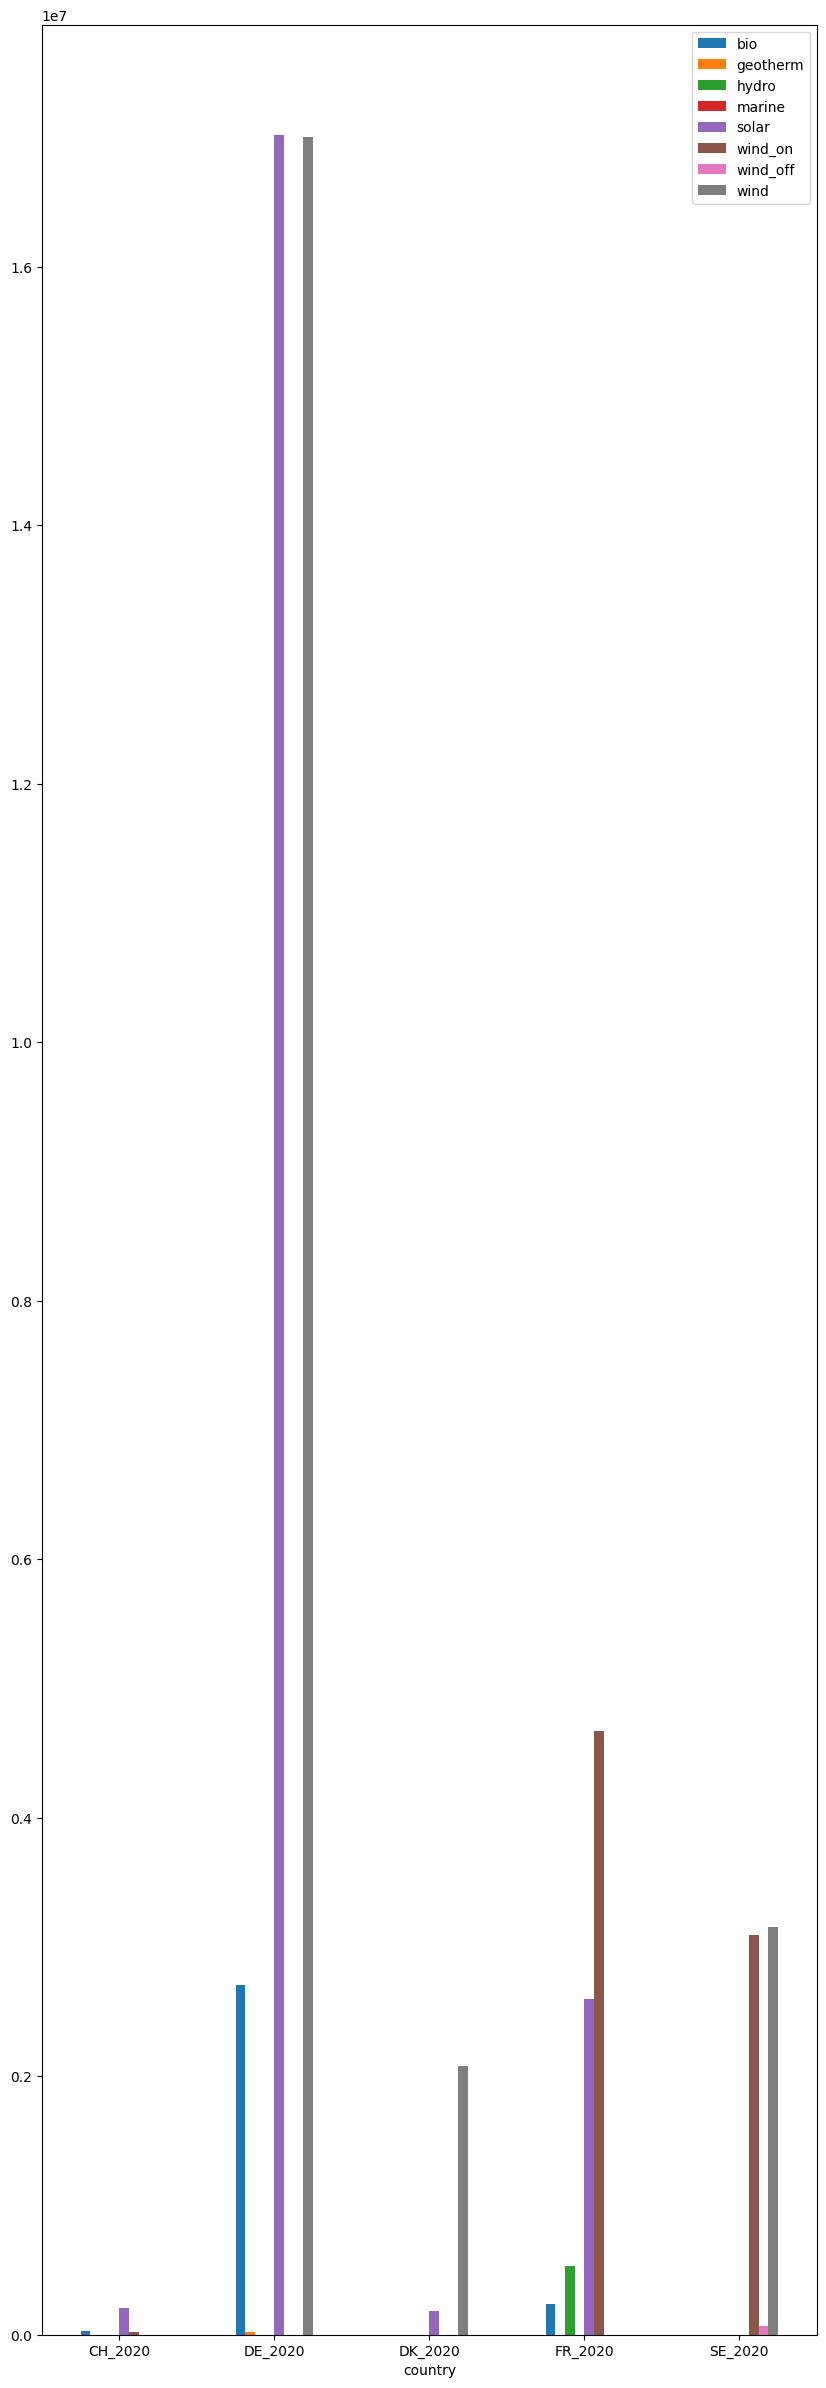

In [43]:
df_all_countires.plot.bar(x='country', rot=0, figsize=(10, 30))

Heatmap of the data

In [46]:
import seaborn as sns

In [56]:
df_all_countires_tr = df_all_countires.T
df_all_countires_tr

country,CH_2020,DE_2020,DK_2020,FR_2020,SE_2020
bio,29374.605,2.703189e+06,0.000,239690.576,0.00
geotherm,0.000,1.721868e+04,0.000,623.450,0.00
hydro,0.000,0.000000e+00,0.000,529181.664,0.00
marine,0.000,0.000000e+00,0.000,926.750,0.00
solar,209074.463,1.702132e+07,184484.584,2596392.910,0.00
wind_on,21626.301,0.000000e+00,0.000,4668181.964,3090078.47
wind_off,0.000,0.000000e+00,0.000,0.000,64417.55
wind,0.000,1.700220e+07,2079314.893,0.000,3154496.02


In [65]:
# this is for further comparison with the data of total energy capacity
total_renews_per_countries_ch = df_all_countires_tr['CH_2020'].sum()
total_renew_per_countries_de = df_all_countires_tr['DE_2020'].sum()
total_renews_per_countries_dk = df_all_countires_tr['DK_2020'].sum()
total_renews_per_countries_fr = df_all_countires_tr['FR_2020'].sum()
total_renews_per_countries_se = df_all_countires_tr['SE_2020'].sum()

total_renew_per_countries = [total_renews_per_countries_ch, total_renew_per_countries_de, total_renews_per_countries_dk, total_renews_per_countries_fr, total_renews_per_countries_se]
total_renew_per_countries

[260075.369, 36743934.639000006, 2263799.477, 8034997.314000001, 6308992.04]

In [57]:
data = df_all_countires
data.head()

,bio,geotherm,hydro,marine,solar,wind_on,wind_off,wind
country,,,,,,,,
CH_2020,29374.605,0.000,0.000,0.00,2.090745e+05,21626.301,0.00,0.000000e+00
DE_2020,2703188.547,17218.678,0.000,0.00,1.702132e+07,0.000,0.00,1.700220e+07
DK_2020,0.000,0.000,0.000,0.00,1.844846e+05,0.000,0.00,2.079315e+06
FR_2020,239690.576,623.450,529181.664,926.75,2.596393e+06,4668181.964,0.00,0.000000e+00
SE_2020,0.000,0.000,0.000,0.00,0.000000e+00,3090078.470,64417.55,3.154496e+06


Text(0.5, 1.0, 'Renewable Capacity in Czechia, Germany, Denmark, France, Sweden')

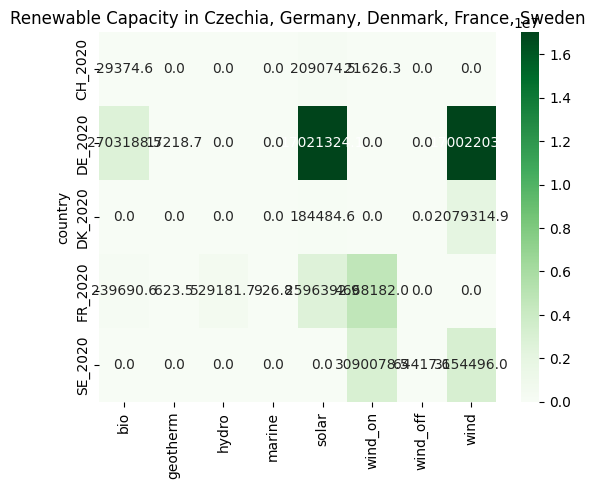

In [72]:
ax = sns.heatmap(data=data, cmap='Greens', annot=True, fmt='.1f')
ax.set_title('Renewable Capacity in Czechia, Germany, Denmark, France, Sweden')

In [38]:
df_all_countires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, CH_2020 to SE_2020
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bio       5 non-null      float64
 1   geotherm  5 non-null      float64
 2   hydro     5 non-null      float64
 3   marine    5 non-null      float64
 4   solar     5 non-null      float64
 5   wind_on   5 non-null      float64
 6   wind_off  5 non-null      float64
 7   wind      5 non-null      float64
dtypes: float64(8)
memory usage: 532.0+ bytes


In [41]:
renews_CH.loc[len(renews_CH.index)] = [total_renews_CHb,
total_renews_CHs,
total_renews_CHwon]
renews_CH

,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity
day,,,
2020-01-01,87.165,620.399,64.173
2020-01-02,87.165,620.399,64.173
2020-01-03,87.165,620.399,64.173
2020-01-04,87.165,620.399,64.173
2020-01-05,87.165,620.399,64.173
...,...,...,...
2020-11-30,87.165,620.399,64.173
2020-12-01,87.165,620.399,64.173
2020-12-02,87.165,620.399,64.173


Dynamics of the renewable utilisation from 1900 to 2020 for countries and type of renewable energy

In [26]:
all_renewables.drop(all_renewables.index[1900-1-1:1980-12-31], axis=0, inplace=True)
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity,year
day,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-02,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-03,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-04,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-05,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900


In [29]:
all_renewables.describe(include='all') 

C:\Users\zirav\AppData\Local\Temp\ipykernel_1880\2171457634.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_renewables.describe(include='all')


,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity,year
count,44127,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,...,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000
unique,44127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.865608,39.403488,3.995944,869.149161,2.771695,3397.673421,3611.735855,189.018992,3422.716863,...,1293.724899,2.459039,390.820921,1358.597827,441.387162,917.210665,512.692006,18.102557,494.589449,1960.010538
std,NaN,21.345770,137.788240,13.828418,2203.826169,9.705973,10771.725843,9985.031096,858.258908,9238.007721,...,1415.121647,7.871437,1654.124007,4244.102553,1561.209432,2706.915919,1629.208387,52.237271,1581.012145,34.883467
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,NaN,0.000000,0.000000,0.000000,1.633000,0.000000,0.000000,0.000000,0.000000,0.000000,...,94.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1930.000000


<AxesSubplot: xlabel='year'>

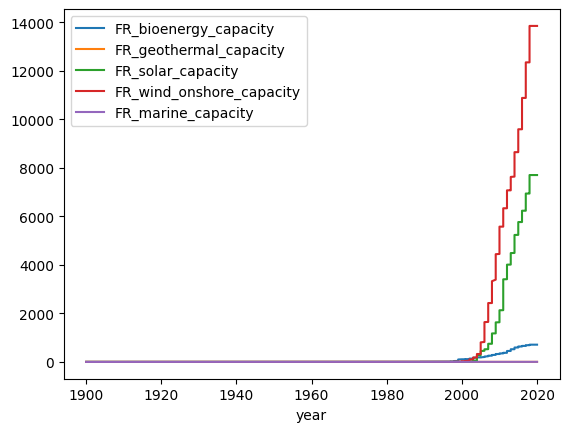

In [30]:
all_renewables.plot(x='year', y=['FR_bioenergy_capacity', 'FR_geothermal_capacity', 'FR_solar_capacity', 'FR_wind_onshore_capacity', 'FR_marine_capacity'])

<AxesSubplot: xlabel='year'>

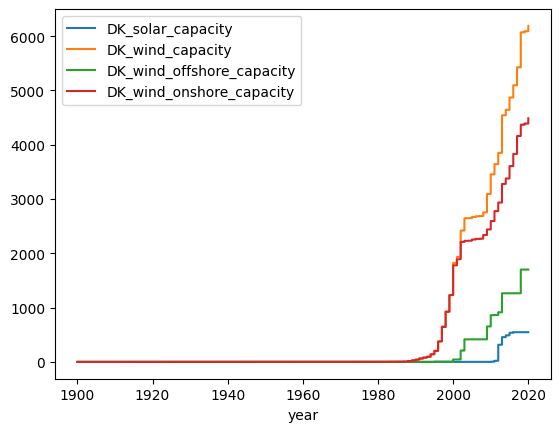

In [31]:
all_renewables.plot(x='year', y=['DK_solar_capacity', 'DK_wind_capacity', 'DK_wind_offshore_capacity', 'DK_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

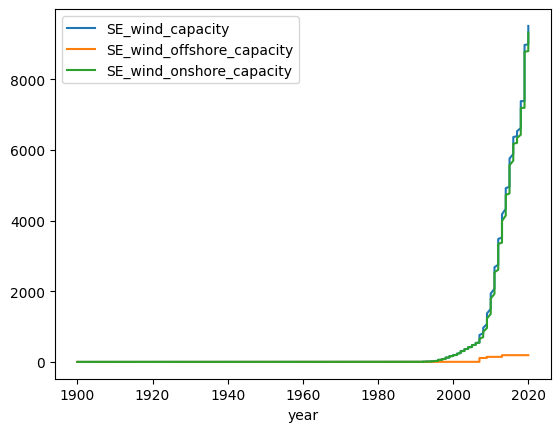

In [32]:
all_renewables.plot(x='year', y=['SE_wind_capacity', 'SE_wind_offshore_capacity', 'SE_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

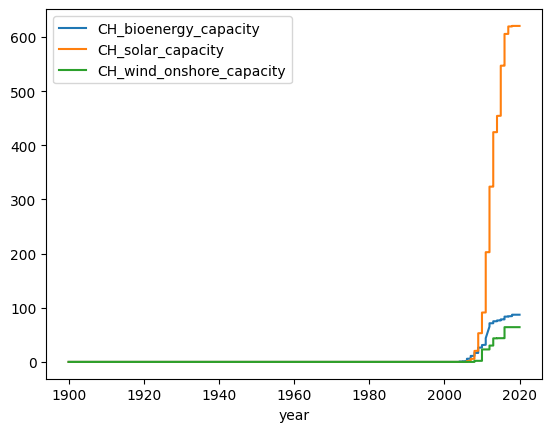

In [33]:
all_renewables.plot(x='year', y=['CH_bioenergy_capacity', 'CH_solar_capacity', 'CH_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

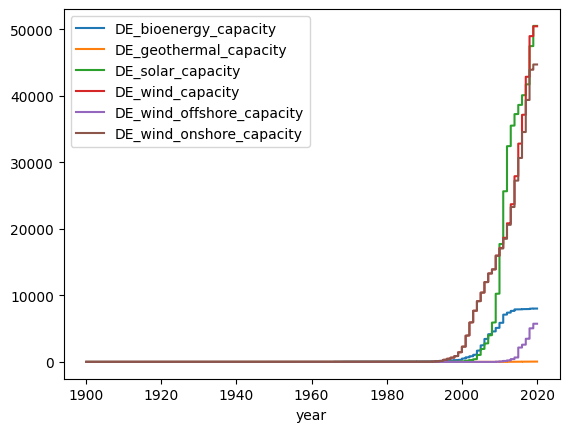

In [34]:
all_renewables.plot(x='year', y=['DE_bioenergy_capacity', 'DE_geothermal_capacity', 'DE_solar_capacity', 'DE_wind_capacity', 'DE_wind_offshore_capacity', 'DE_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

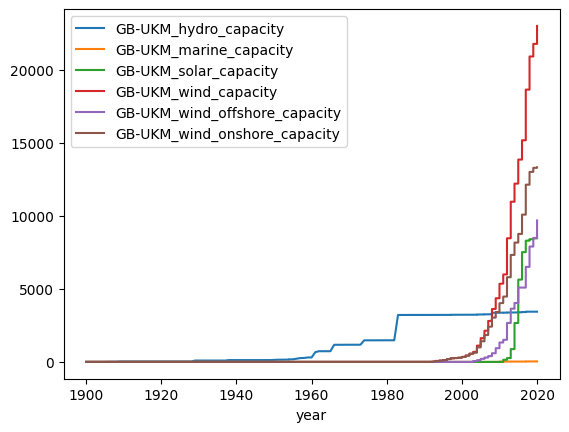

In [35]:
all_renewables.plot(x='year', y=['GB-UKM_hydro_capacity', 'GB-UKM_marine_capacity', 'GB-UKM_solar_capacity', 'GB-UKM_wind_capacity', 'GB-UKM_wind_offshore_capacity', 'GB-UKM_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

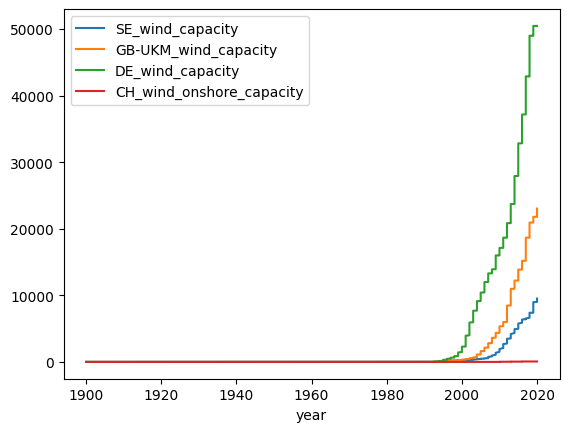

In [36]:
all_renewables.plot(x='year', y=['SE_wind_capacity', 'GB-UKM_wind_capacity', 'DE_wind_capacity', 'CH_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

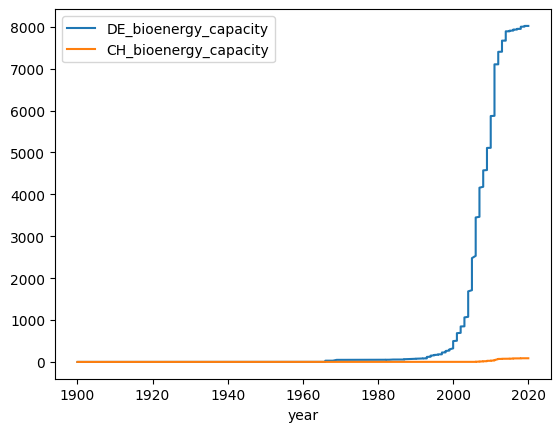

In [37]:
all_renewables.plot(x='year', y=['DE_bioenergy_capacity', 'CH_bioenergy_capacity'])

<AxesSubplot: xlabel='year'>

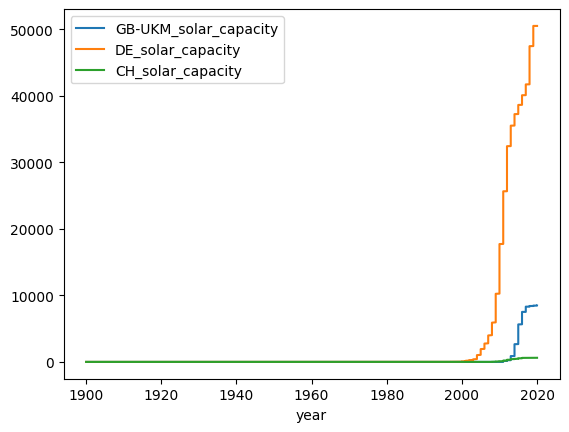

In [38]:
all_renewables.plot(x='year', y=['GB-UKM_solar_capacity', 'DE_solar_capacity', 'CH_solar_capacity'])